In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [0]:
class plot_error_surfaces(object):

  def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
    W = np.linspace(-w_range, w_range, n_samples)
    B = np.linspace(-b_range, b_range, n_samples)
    w, b = np.meshgrid(W,B)
    Z = np.zeros((30,30))
    count1 = 0
    self.y = Y.numpy()
    self.x = X.numpy()
    for w1, b1 in zip(w,b):
      count2=0
      for w2, b2 in zip(w1,b1):
        Z[count1, count2] = np.mean((self.y - w2 * self.x + b2)**2)
        count2 +=1
      count1 +=1

    self.Z = Z
    self.w = w
    self.b = b
    self.W = []
    self.B = []
    self.LOSS = []
    self.n = 0
    if go == True:
      plt.figure()
      plt.figure(figsize = (7.5,5))
      plt.axes(projection ='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap ='viridis', edgecolor = 'none')
      plt.title('Loss Surface')
      plt.xlabel('w')
      plt.ylabel('b')
      plt.show()
      plt.figure()
      plt.title('Loss Surface Contour')
      plt.xlabel('w')
      plt.ylabel('b')
      plt.contour(self.w, self.b, self.Z)
      plt.show()
    
  def set_para_loss(self, W, B, loss):
    self.n = self.n + 1
    self.W.append(W)
    self.B.append(B)
    self.LOSS.append(loss)

  def final_plot(self):
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(self.w, self.b, self.Z)
    ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s= 200, alpha=1)
    plt.figure()
    plt.contour(self.w, self.b, self.Z)
    plt.scatter(self.W, self.B, c='r', marker='x')
    plt.xlabel('w')
    plt.ylabel('b')
    plt.show()
  
  def plot_ps(self):
    plt.subplot(121)
    plt.ylim
    plt.plot(self.x, self.y, 'ro', label="training points")
    plt.plot(self.x, self.W[-1]*self.x + self.B[-1], label ="estimated line")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim((-10,15))
    plt.title('Data Space Iteration: ' + str(self.n))
    plt.subplot(122)
    plt.contour(self.w, self.b, self.Z)
    plt.scatter(self.W, self.B, c='r', marker='x')
    plt.title('Loss Surface Contour Iteration' + str(self.n))
    plt.xlabel('w')
    plt.ylabel('b')
    plt.show()

In [4]:
torch.manual_seed(1)

In [0]:
X = torch.arange(-3,3,0.1).view(-1,1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

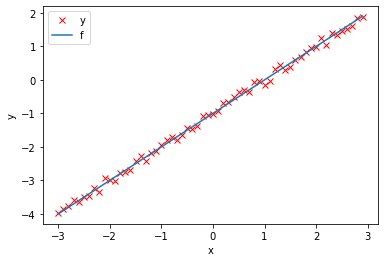

In [7]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label ='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [0]:
def forward(x):
  return w * x + b

In [0]:
def criterion(yhat, y):
  return torch.mean((yhat - y)** 2)

<Figure size 432x288 with 0 Axes>

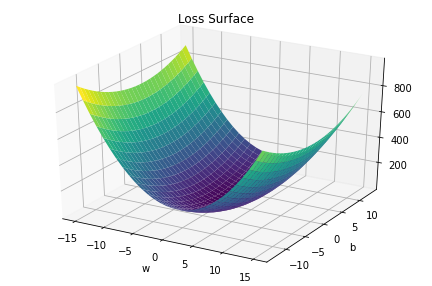

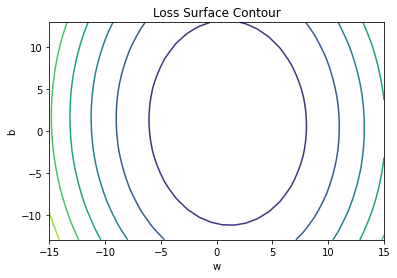

In [12]:
get_surface = plot_error_surfaces(15,13,X,Y,30)

In [0]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [0]:
lr = 0.1
LOSS_BGD = []

In [0]:
def train_model(iter):
  for epoch in range(iter):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)

    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    get_surface.plot_ps()

    LOSS_BGD.append(loss)

    loss.backward()

    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data

    w.grad.data.zero_()
    b.grad.data.zero_()    

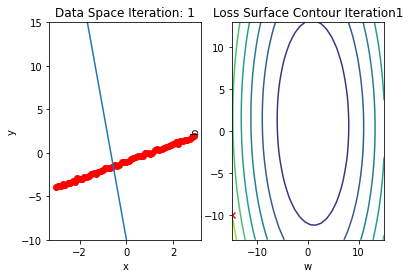

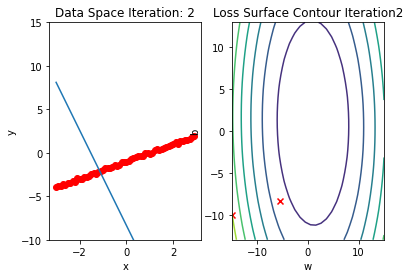

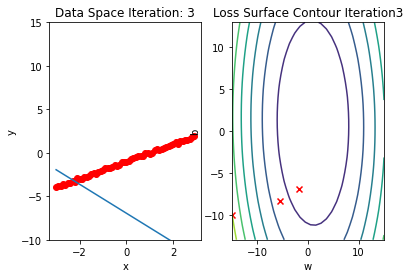

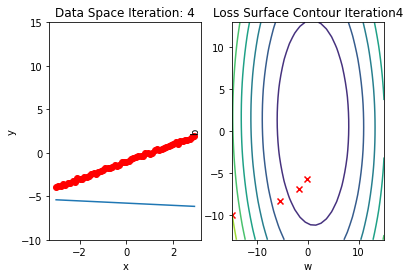

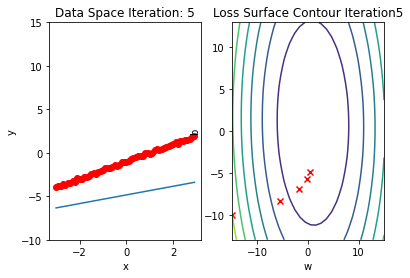

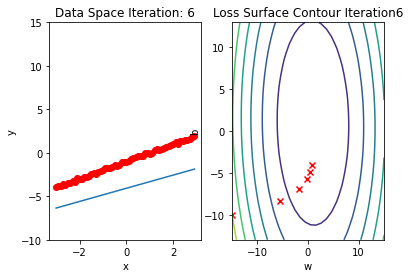

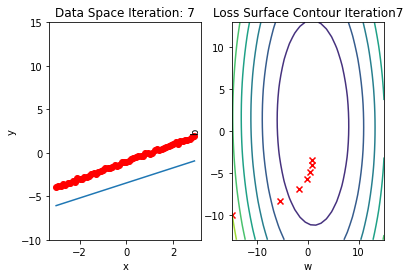

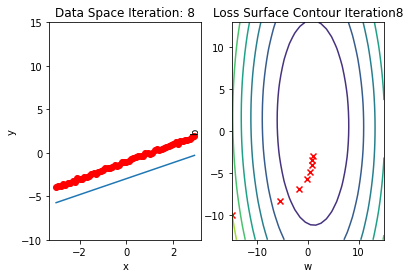

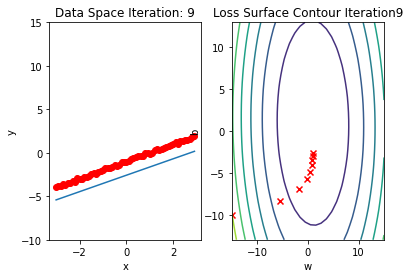

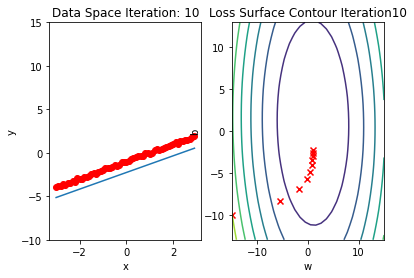

In [17]:
train_model(10)

##Train the Model: Stochastic Gradient Descent

In [0]:
get_surface = plot_error_surfaces(15,13,X,Y,30, go = False)

In [0]:
LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):

  for epoch in range(iter):
    Yhat = forward(X)
    LOSS_SGD.append(criterion(Yhat, Y).tolist())
    
    for x, y in zip(X, Y):
      yhat = forward(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      loss.backward()

      w.data = w.data - lr*w.grad.data
      b.data = b.data - lr*b.grad.data

      w.grad.data.zero_()
      b.grad.data.zero_()

    get_surface.plot_ps()

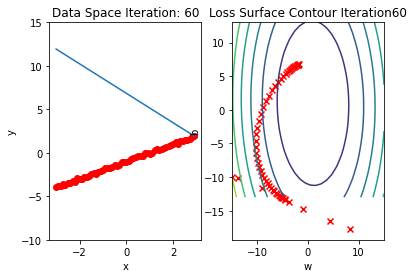

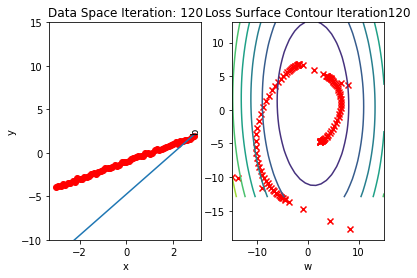

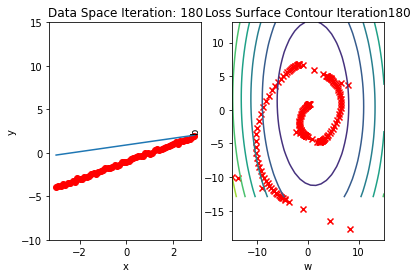

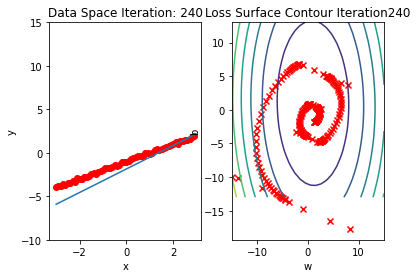

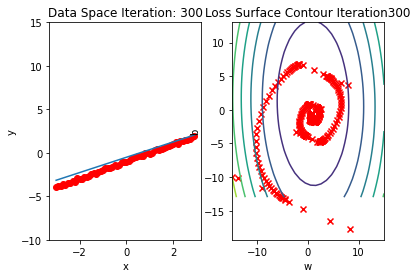

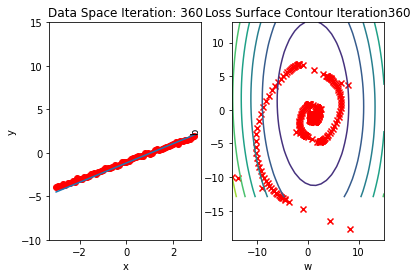

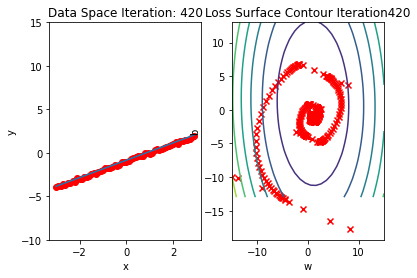

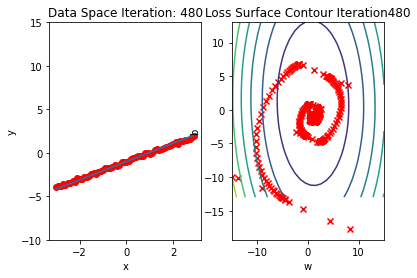

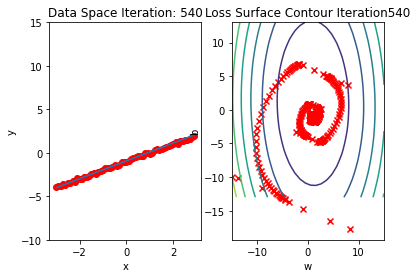

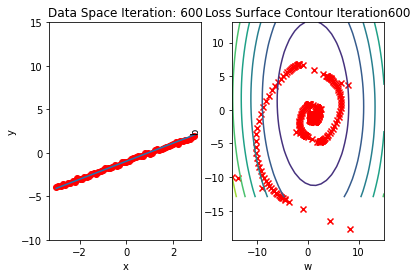

In [25]:
train_model_SGD(10)

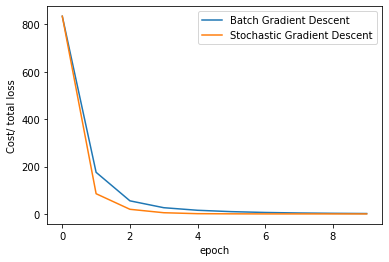

In [26]:
# Plot out the LOSS_BGD and LOSS_SGD

plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

In [0]:
from torch.utils.data import Dataset, DataLoader

In [0]:
class Data(Dataset):

  def __init__(self):
    self.x = torch.arange(-3,3,0.1).view(-1,1)
    self.y = 1* self.x -1
    self.len = self.x.shape[0]
  
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  
  def __len__(self):
    return self.len

In [29]:
dataset = Data()
print("The length of dataset: ", len(dataset))

The length of dataset:  60


In [30]:
x, y = dataset[0:3]
print("The first 3 x: ",x)
print("The first 3 y: ",y)

The first 3 x:  tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3 y:  tensor([[-4.0000],
        [-3.9000],
        [-3.8000]])


In [0]:
get_surface = plot_error_surfaces(15,3,X,Y, 30, go = False)

In [0]:
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [0]:
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_Loader = []


def train_model_DataLoader(epochs):

  for epoch in range(epochs):
    Yhat = forward(X)
    LOSS_SGD.append(criterion(Yhat, Y).tolist())
    
    for x, y in trainloader:
      yhat = forward(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      loss.backward()

      w.data = w.data - lr*w.grad.data
      b.data = b.data - lr*b.grad.data

      w.grad.data.zero_()
      b.grad.data.zero_()

    get_surface.plot_ps()

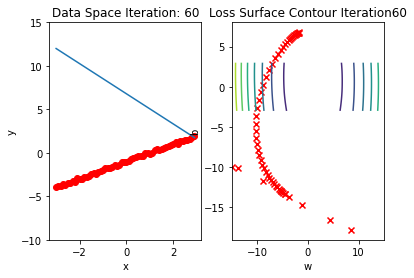

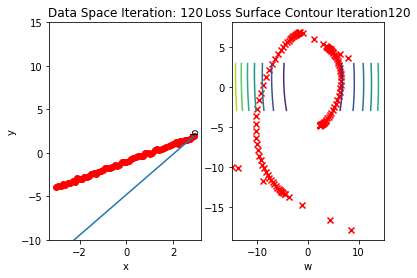

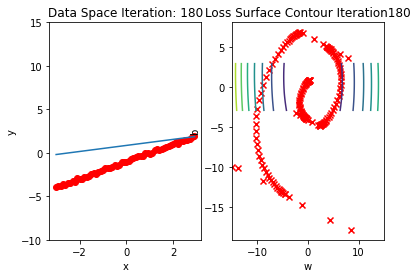

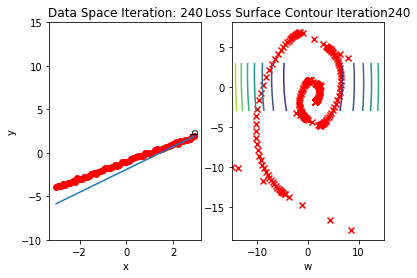

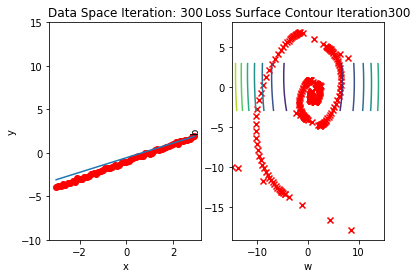

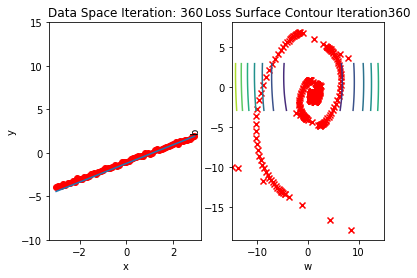

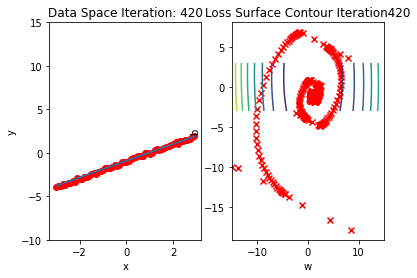

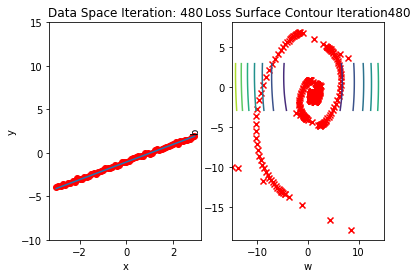

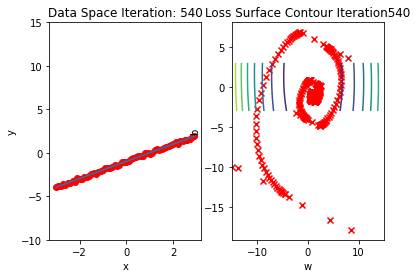

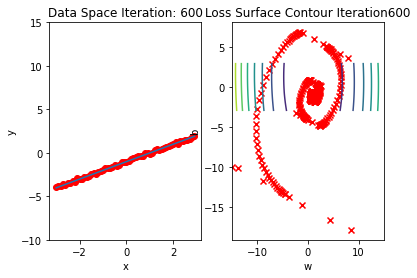

In [36]:
train_model_DataLoader(10)

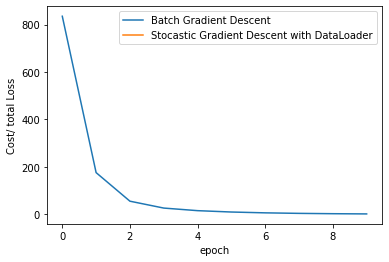

In [37]:
plt.plot(LOSS_BGD, label="Batch Gradient Descent")
plt.plot(LOSS_Loader, label="Stocastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total Loss')
plt.legend()
plt.show()

In [0]:
LOSS = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad=True)

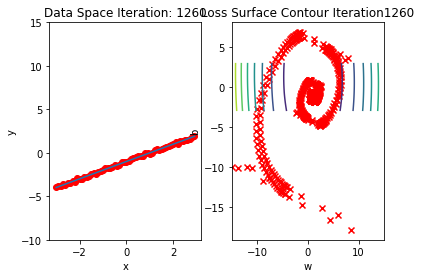

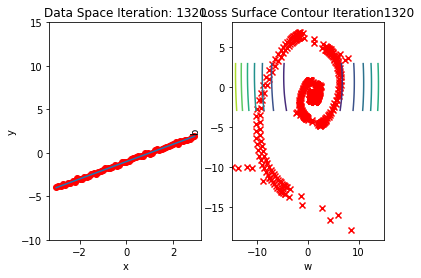

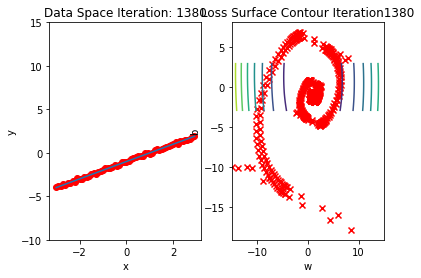

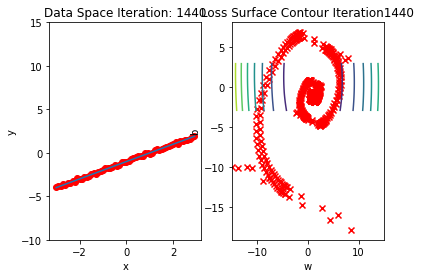

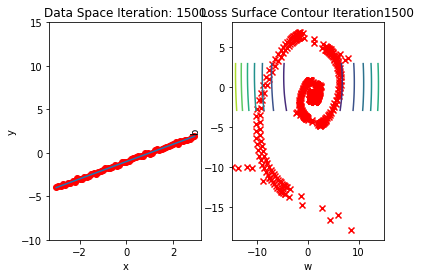

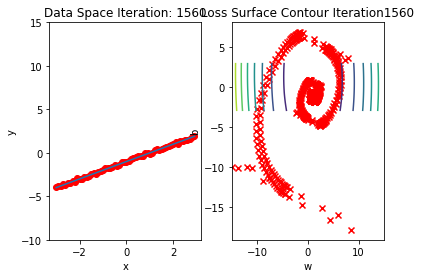

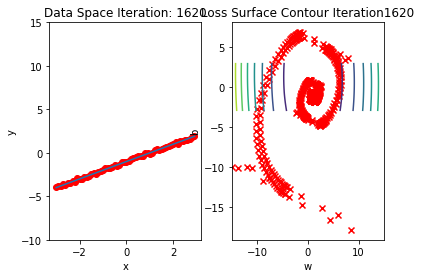

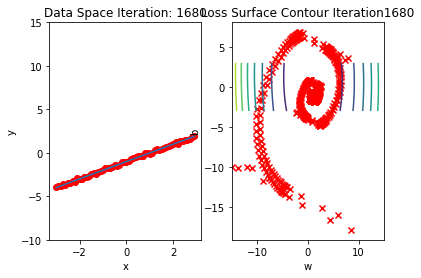

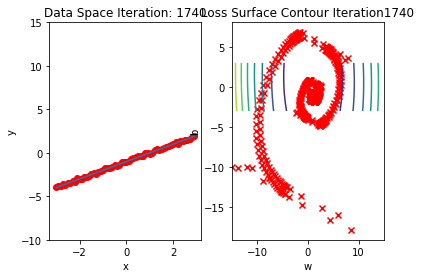

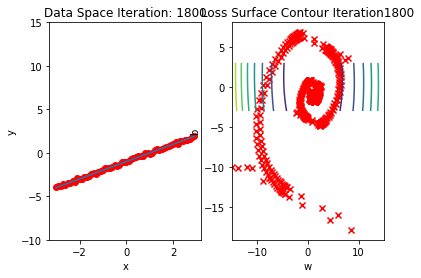

In [41]:
def my_train_model(epochs):

  for epoch in range(epochs):
    Yhat = forward(X)
    LOSS.append(criterion(Yhat, Y).tolist())
    
    for x, y in trainloader:
      yhat = forward(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      loss.backward()

      w.data = w.data - lr*w.grad.data
      b.data = b.data - lr*b.grad.data

      w.grad.data.zero_()
      b.grad.data.zero_()

    get_surface.plot_ps()

my_train_model(10)

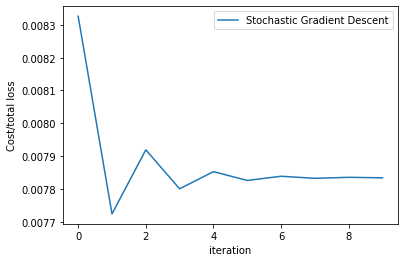

In [42]:
plt.plot(LOSS, label = "Stochastic Gradient Descent")
plt.xlabel('iteration')
plt.ylabel('Cost/total loss')
plt.legend()
plt.show()

##Batch Gradient Descent(BGD)

In [0]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.1
LOSS_BGD = []

def train_model_BGD(epochs):
  for epoch in range(epochs):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    LOSS_BGD.append(loss)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    get_surface.plot_ps()
    loss.backward()
    w.data = w.data - lr * w.grad.data
    b.data = b.data - lr * b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()


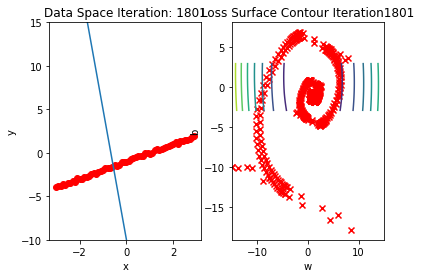

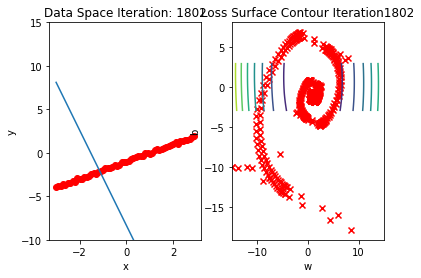

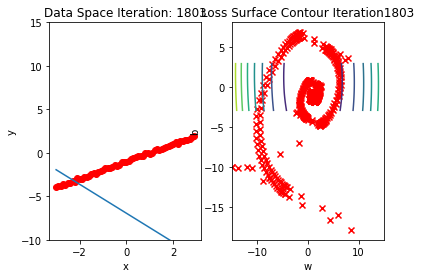

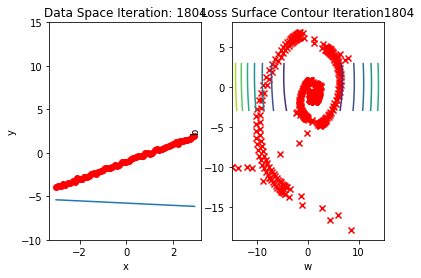

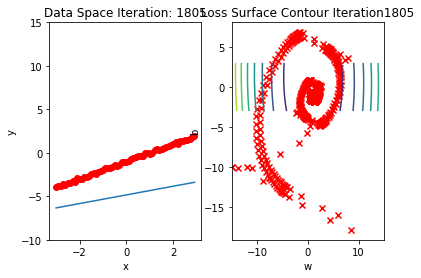

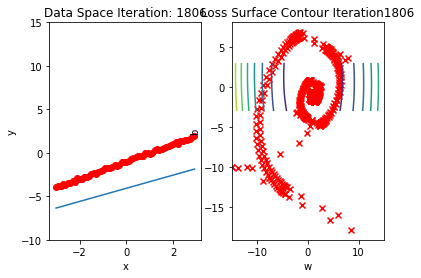

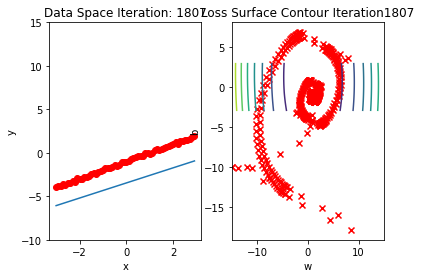

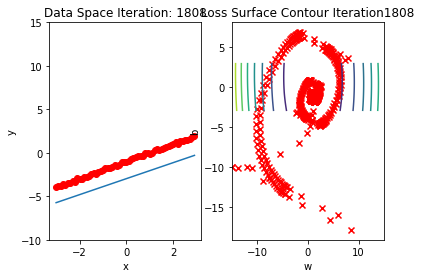

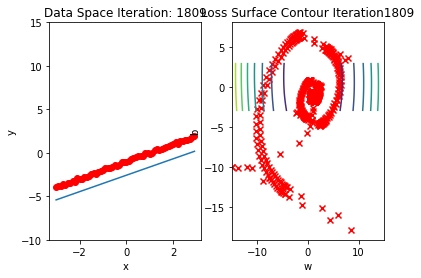

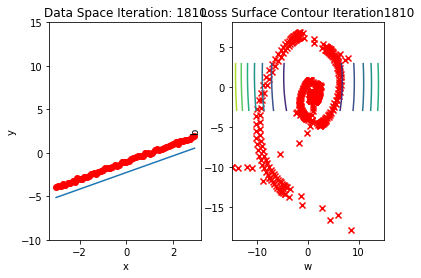

In [44]:
train_model_BGD(10)

##Mini Batch Gradient Descent: Batch Size Equals 5

In [0]:
get_surface = plot_error_surfaces(15,13,X,Y,30, go = False)

In [0]:
dataset=Data()
trainloader = DataLoader(dataset = dataset, batch_size = 5)

In [0]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.1
LOSS_MINI5 = []

def train_model_Mini5(epochs):
  for epoch in range(epochs):
    Yhat = forward(X)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
    get_surface.plot_ps()
    LOSS_MINI5.append(criterion(forward(X), Y).tolist())
    for x, y in trainloader:
      yhat = forward(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      loss.backward()
      w.data = w.data - lr * w.grad.data
      b.data = b.data - lr * b.grad.data
      w.grad.data.zero_()
      b.grad.data.zero_()

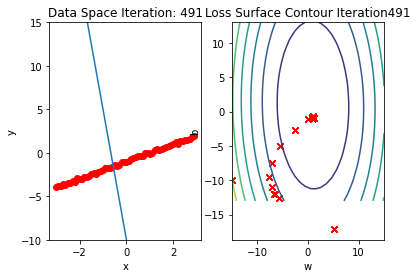

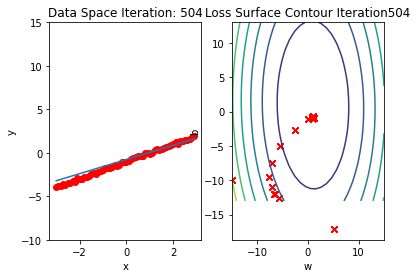

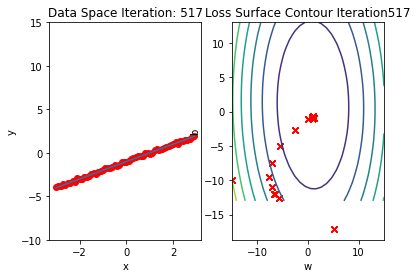

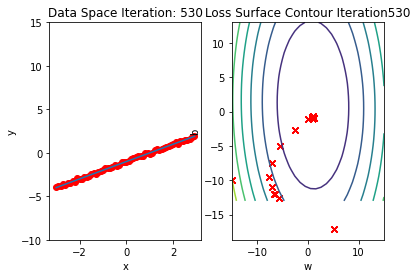

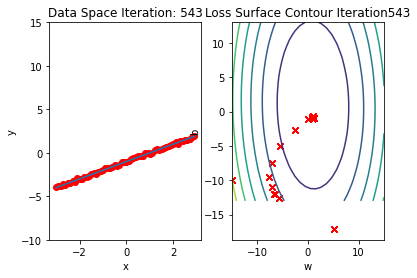

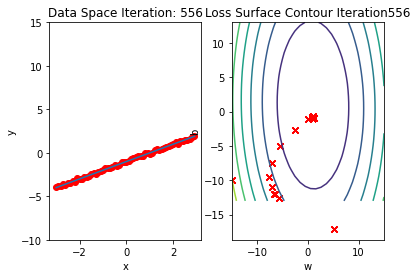

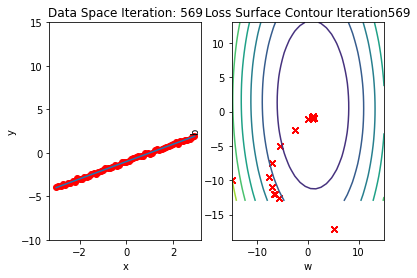

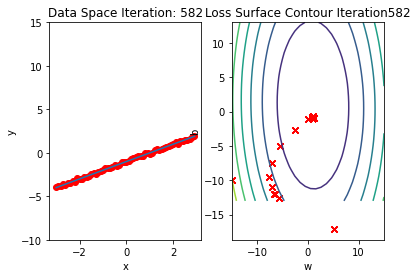

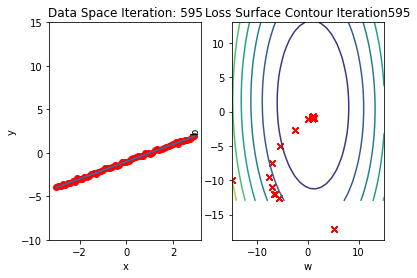

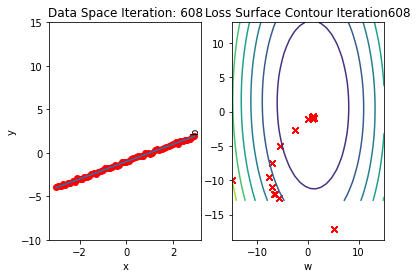

In [60]:
train_model_Mini5(10)

In [0]:
get_surface = plot_error_surfaces(15,13,X,Y,30, go = False)
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

In [0]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.1
LOSS_MINI10 = []

def train_model_Mini10(epochs):
  for epoch in range(epochs):
    Yhat = forward(X)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
    get_surface.plot_ps()
    LOSS_MINI10.append(criterion(forward(X), Y).tolist())
    for x, y in trainloader:
      yhat = forward(x)
      loss = criterion(yhat, y)
      get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
      loss.backward()
      w.data = w.data - lr * w.grad.data
      b.data = b.data - lr * b.grad.data
      w.grad.data.zero_()
      b.grad.data.zero_()

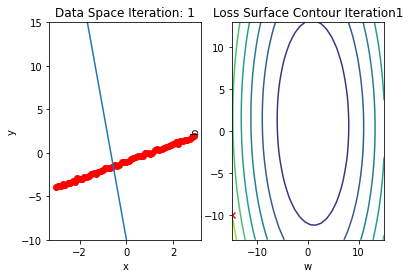

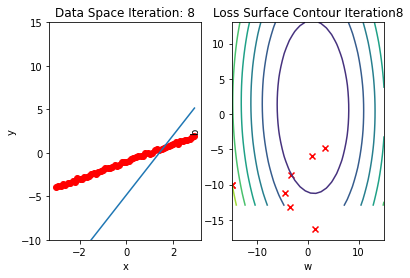

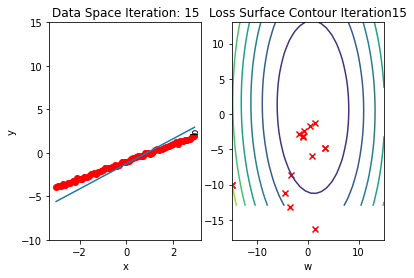

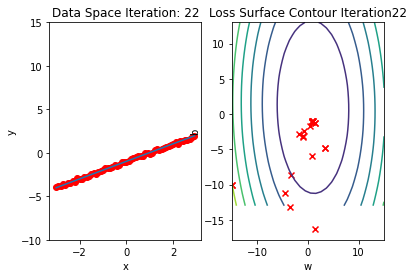

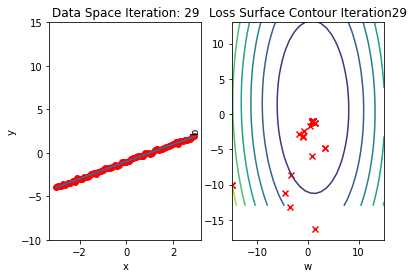

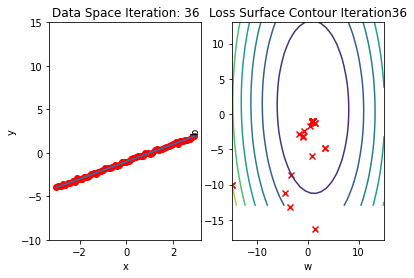

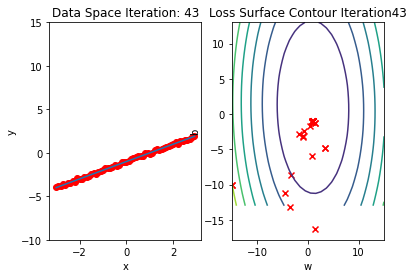

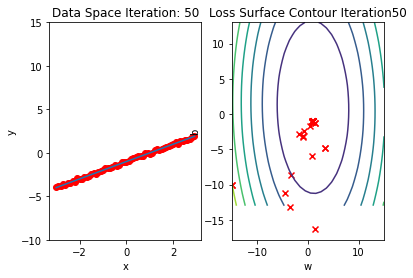

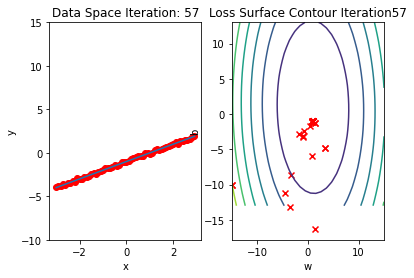

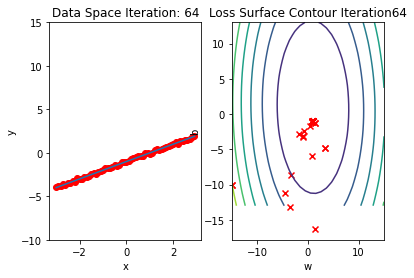

In [63]:
train_model_Mini10(10)

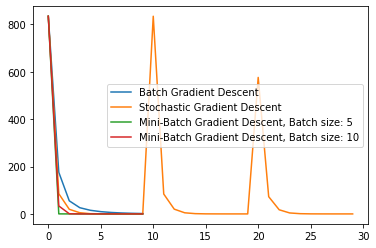

In [64]:
plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5,label = "Mini-Batch Gradient Descent, Batch size: 5")
plt.plot(LOSS_MINI10,label = "Mini-Batch Gradient Descent, Batch size: 10")
plt.legend()

In [0]:
# class for ploting  

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram    
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [0]:
class Data(Dataset):

  def __init__(self):
    self.x = torch.arange(-3,3,0.1).view(-1,1)
    self.f = 1* self.x -1
    self.y = self.f+0.1*torch.randn(self.x.size())
    self.len = self.x.shape[0]
  
  def __getitem__(self, index):
    return self.x[index], self.y[index]
  
  def __len__(self):
    return self.len

In [0]:
dataset = Data()

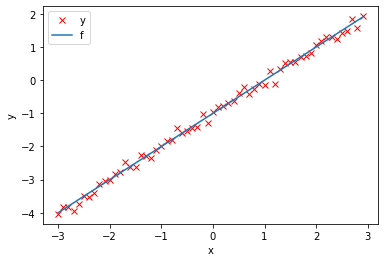

In [85]:
plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [0]:
from torch import nn, optim
class linear_regression(nn.Module):
  def __init__(self, input_size, output_size):
    super(linear_regression, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    yhat = self.linear(x)
    return yhat

In [0]:
criterion = nn.MSELoss()

In [88]:
model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)
list(model.parameters())

[Parameter containing:
 tensor([[0.1392]], requires_grad=True), Parameter containing:
 tensor([0.4520], requires_grad=True)]

In [89]:
optimizer.state_dict()

{'param_groups': [{'dampening': 0,
   'lr': 0.01,
   'momentum': 0,
   'nesterov': False,
   'params': [139723970844424, 139723970846296],
   'weight_decay': 0}],
 'state': {}}

In [0]:
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [0]:
model.state_dict()['linear.weight'][0]=-15
model.state_dict()['linear.bias'][0]=-10

In [0]:
get_surface = plot_error_surfaces(15,13,dataset.x, dataset.y, 30, go =False)

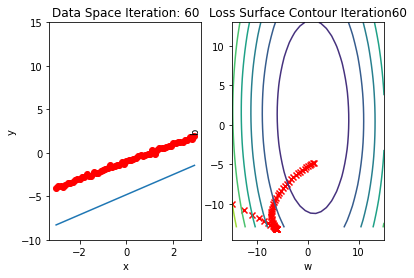

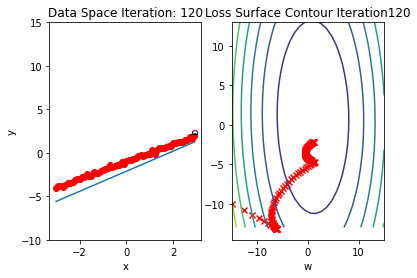

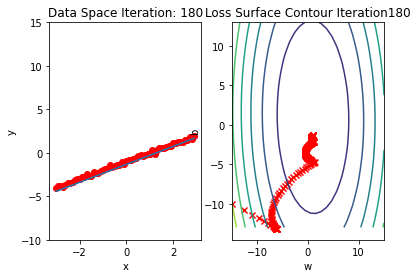

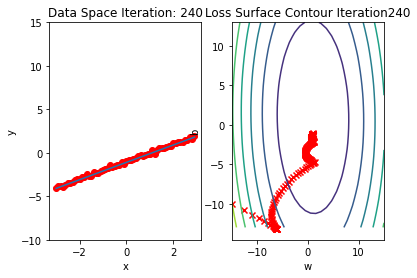

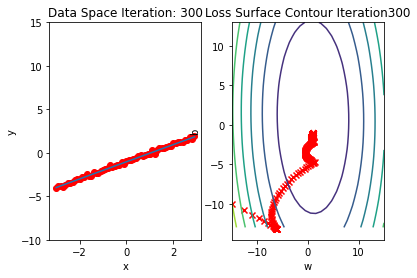

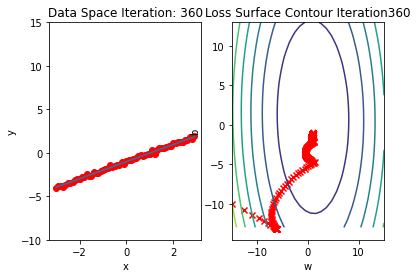

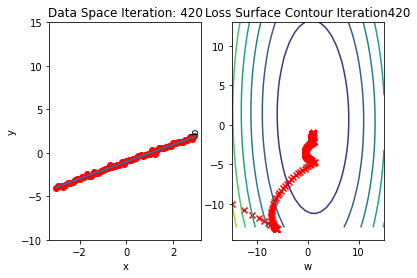

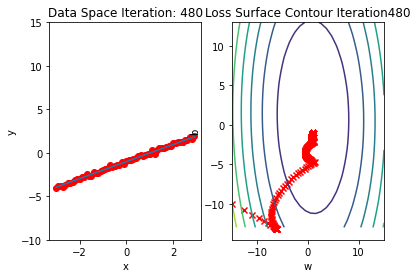

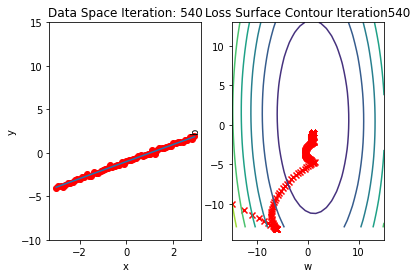

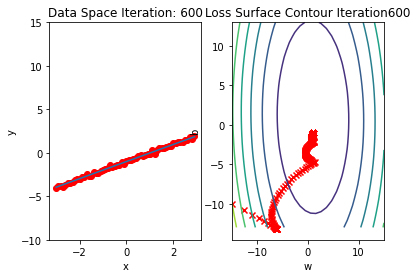

In [93]:
def train_model_BGD(iter):
  for epoch in range(iter):
     for x,y in trainloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        get_surface.set_para_loss(model, loss.tolist())
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
     get_surface.plot_ps()

train_model_BGD(10)

In [94]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.9879]])),
             ('linear.bias', tensor([-1.0002]))])